### Library Imports and Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Driver model - Multiple regression 

Import data 

In [203]:
driver_df = pd.read_csv("data/updated_driver_data_mr_train.csv")

In [179]:
driver_df

,driver,position,gap_to_leader,fantasy_points
0,VER_r1_fp1,6,0.369,45
1,PER_r1_fp1,12,0.544,31
2,NOR_r1_fp1,2,0.032,16
3,LEC_r1_fp1,8,0.399,22
4,SAI_r1_fp1,11,0.516,36
...,...,...,...,...
215,SAR_r4_fp3,19,1.889,9
216,HUL_r4_fp3,16,1.576,10
217,TSU_r4_fp3,9,0.778,10
218,RIC_r4_fp3,13,1.119,-19


Check that data is linear (somewhat)

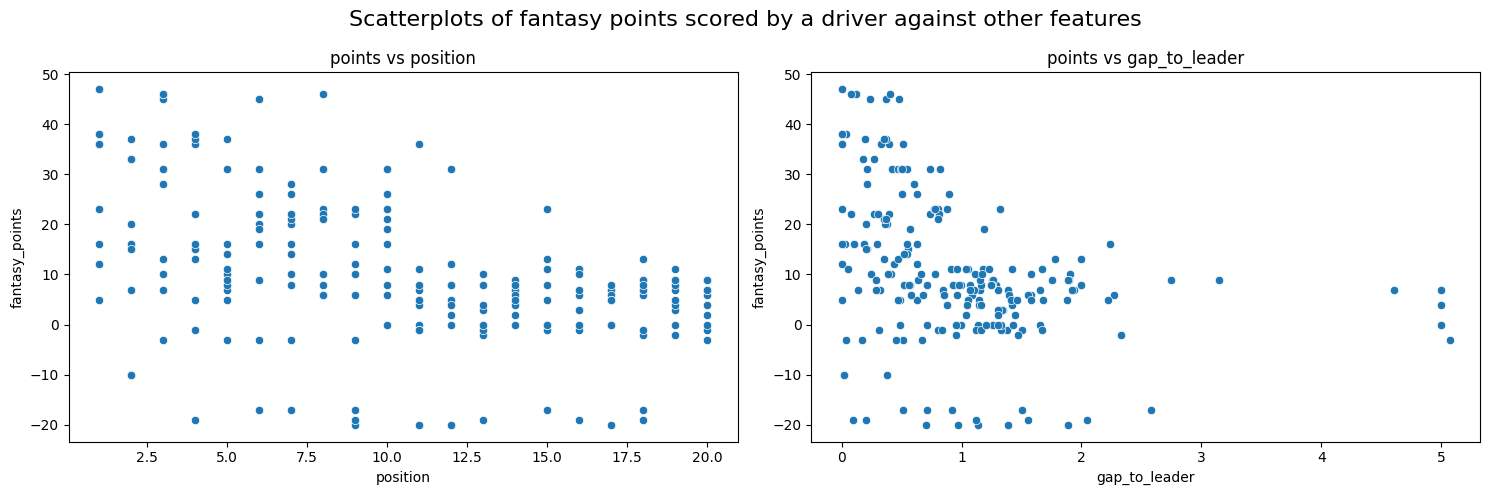

In [180]:
# Make sure the relationship looks linear
possible_features = ['position', 'gap_to_leader']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=driver_df, x=feature, y="fantasy_points", ax=axes[index])
    axes[index].set_title(f'points vs {feature}')

fig.suptitle("Scatterplots of fantasy points scored by a driver against other features", fontsize=16)
fig.tight_layout()

Run backward selection to identify which features to use

In [181]:
# Create the model with everything first
selected_features = ['position', 'gap_to_leader']
y_train = driver_df["fantasy_points"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = driver_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = driver_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['position', 'gap_to_leader'] Score: 0.2158377588076854
Feature: position Score Diff: 0.08471872702351202 Score: 0.1311190317841734
Feature: gap_to_leader Score Diff: 3.1425268383733496e-05 Score: 0.21580633353930168
Removed Feature: gap_to_leader
Features: ['position'] Score: 0.21580633353930168


Create model with train/test split

In [225]:
# Extract Data
X = driver_df[['position', 'gap_to_leader']]
y = driver_df["fantasy_points"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[-1.08632743  0.58277322] 21.13882113983449


In [71]:
# make predictions on test data
y_pred = model.predict(X_test)
y_pred

array([24.72527057, 13.87588378,  2.37526851,  9.00366155, 12.12980954,
       21.41486026,  9.12482034, 12.22320277,  7.01148352, 18.25463636,
       -0.86951412,  7.45699448, -1.82679417,  0.95228437,  4.03173574,
       -3.51481316])

Calculate the model's accuracy

In [205]:
model.score(X_test, y_test)

0.30953850711222575

### Take in a session worth of data to predict based on

In [226]:
driver_results_df = pd.read_csv("data/driver_data_mr_test_cost.csv")

Make predictions and save them 

In [227]:
driver_results_df["fantasy_points"] = model.predict(driver_results_df[["position", "gap_to_leader"]])

In [208]:
driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
0,VER_r5,3,0.358,30.1,18.088472
1,PER_r5,4,3.880,23.0,19.054671
2,NOR_r5,16,2.328,24.1,5.114278
3,LEC_r5,13,1.788,22.0,8.058563
4,SAI_r5,14,1.982,20.4,7.085294
5,HAM_r5,18,2.537,19.0,3.063423
6,RUS_r5,17,2.504,19.1,4.130519
7,MAG_r5,5,0.816,8.7,16.182727
8,ALO_r5,19,2.634,16.5,2.033625
9,GAS_r5,20,2.974,7.8,1.145440


In [228]:
driver_results_df = driver_results_df.sort_values(by="fantasy_points", ascending=False)
driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
14,STR_r5,1,0.000,13.0,20.052494
11,PIA_r5,2,0.327,19.9,19.156733
1,PER_r5,4,3.880,23.0,19.054671
0,VER_r5,3,0.358,30.1,18.088472
7,MAG_r5,5,0.816,8.7,16.182727
16,HUL_r5,5,0.799,7.6,16.172820
12,OCO_r5,7,0.911,9.0,14.065436
13,ALB_r5,8,0.927,7.5,12.988432
18,RIC_r5,9,0.936,8.8,11.907350
19,BOT_r5,10,1.228,6.2,10.991192


In [229]:
def fix_name(driver):
    return driver[0:3]

driver_results_df["driver"] = driver_results_df["driver"].map(fix_name) 

driver_results_df

,driver,position,gap_to_leader,price,fantasy_points
14,STR,1,0.000,13.0,20.052494
11,PIA,2,0.327,19.9,19.156733
1,PER,4,3.880,23.0,19.054671
0,VER,3,0.358,30.1,18.088472
7,MAG,5,0.816,8.7,16.182727
16,HUL,5,0.799,7.6,16.172820
12,OCO,7,0.911,9.0,14.065436
13,ALB,8,0.927,7.5,12.988432
18,RIC,9,0.936,8.8,11.907350
19,BOT,10,1.228,6.2,10.991192


In [236]:
driver_results_df["points_per_dollar"] = driver_results_df["fantasy_points"]  / driver_results_df["price"]

driver_results_df

,driver,position,gap_to_leader,price,fantasy_points,points_per_dollar
14,STR,1,0.000,13.0,20.052494,1.542500
11,PIA,2,0.327,19.9,19.156733,0.962650
1,PER,4,3.880,23.0,19.054671,0.828464
0,VER,3,0.358,30.1,18.088472,0.600946
7,MAG,5,0.816,8.7,16.182727,1.860084
16,HUL,5,0.799,7.6,16.172820,2.128003
12,OCO,7,0.911,9.0,14.065436,1.562826
13,ALB,8,0.927,7.5,12.988432,1.731791
18,RIC,9,0.936,8.8,11.907350,1.353108
19,BOT,10,1.228,6.2,10.991192,1.772773


Make a suggestion of the five drivers to use

In [202]:
print("five reccomended drivers: ")
print(driver_results_df["driver"][0:5])

five reccomended drivers: 
14    STR
11    PIA
1     PER
0     VER
7     MAG
Name: driver, dtype: object


## Constructor model - Multiple regression 

In [157]:
constructor_df = pd.read_csv("data/updated_constructor_data_mr_train.csv")

In [158]:
constructor_df

,constructor,position,fantasy_points
0,RED_r1_fp1,18,89
1,FER_r1_fp1,19,73
2,MER_r1_fp1,16,42
3,MCL_r1_fp1,5,36
4,AST_r1_fp1,19,20
...,...,...,...
105,ALP_r4_fp3,31,11
106,HAA_r4_fp3,36,20
107,WIL_r4_fp3,30,-10
108,KCK_r4_fp3,27,-8


<Axes: title={'center': 'position vs points'}, xlabel='position', ylabel='fantasy_points'>

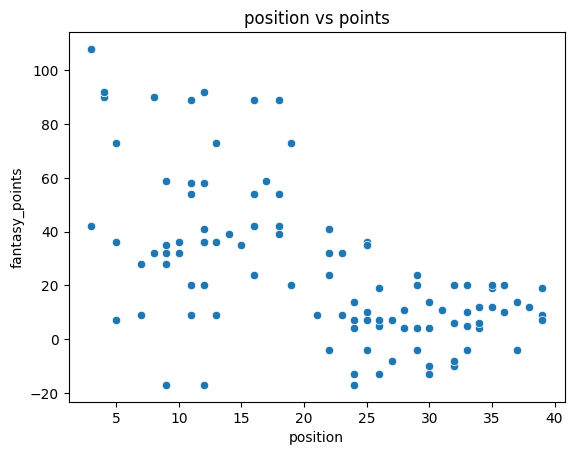

In [159]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")

Make the model

In [211]:
# Extract Data
x = constructor_df[["position"]]
y = constructor_df["fantasy_points"]

# split into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Create the model
c_model = LinearRegression()

# Train the model
c_model = model.fit(x_train, y_train)

print(c_model.coef_, c_model.intercept_)

[-1.62894303] 60.48067864437868


In [147]:
# make predictions on test data
y_pred = c_model.predict(x_test)

Calculate the model's accuracy

In [212]:
# accuracy
c_model.score(x_test, y_test)

0.48712530926953135

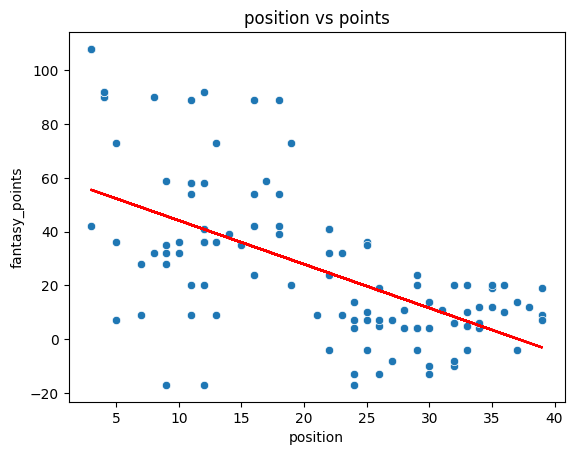

In [172]:
plt.title("position vs points")
sns.scatterplot(data=constructor_df, x="position", y="fantasy_points")
plt.plot(x_train, c_model.predict(x_train), color='r')

### Take in a session worth of data to predict based on

In [213]:
constructor_results_df = pd.read_csv("data/constructor_data_mr_test_cost.csv")

In [214]:
constructor_results_df["fantasy_points"] = c_model.predict(constructor_results_df[["position"]])

In [215]:
constructor_results_df = constructor_results_df.sort_values(by="fantasy_points", ascending=False)
constructor_results_df

,constructor,position,price,fantasy_points
0,RED_r5,7,28.6,49.078077
6,HAA_r5,11,8.2,42.562305
3,MCL_r5,18,20.2,31.159704
4,AST_r5,20,15.1,27.901818
8,KCK_r5,21,5.9,26.272875
9,VRB_r5,21,8.4,26.272875
7,WIL_r5,23,6.3,23.014989
1,FER_r5,27,21.5,16.499217
5,ALP_r5,27,8.4,16.499217
2,MER_r5,35,24.1,3.467673


In [216]:
def fix_name(team):
    return team[0:3]

constructor_results_df["constructor"] = constructor_results_df["constructor"].map(fix_name) 

constructor_results_df

,constructor,position,price,fantasy_points
0,RED,7,28.6,49.078077
6,HAA,11,8.2,42.562305
3,MCL,18,20.2,31.159704
4,AST,20,15.1,27.901818
8,KCK,21,5.9,26.272875
9,VRB,21,8.4,26.272875
7,WIL,23,6.3,23.014989
1,FER,27,21.5,16.499217
5,ALP,27,8.4,16.499217
2,MER,35,24.1,3.467673


In [235]:
constructor_results_df["points_per_dollar"] = constructor_results_df["fantasy_points"]  / constructor_results_df["price"]

constructor_results_df

,constructor,position,price,fantasy_points,points_per_dollar
0,RED,7,28.6,49.078077,1.716017
6,HAA,11,8.2,42.562305,5.190525
3,MCL,18,20.2,31.159704,1.542560
4,AST,20,15.1,27.901818,1.847803
8,KCK,21,5.9,26.272875,4.453030
9,VRB,21,8.4,26.272875,3.127723
7,WIL,23,6.3,23.014989,3.653173
1,FER,27,21.5,16.499217,0.767405
5,ALP,27,8.4,16.499217,1.964192
2,MER,35,24.1,3.467673,0.143887


Print out top 2 reccomended constructors

In [217]:
print("two reccomended constructors: ")
print(constructor_results_df["constructor"][0:2])

two reccomended constructors: 
0    RED
6    HAA
Name: constructor, dtype: object


# Caluculating best team with cost taken into consideration

code below generated by chat gpt and edited by me

In [232]:

def combinations(data, group_size, current_group=[], start=0):
    if len(current_group) == group_size:
        yield pd.DataFrame(current_group)
    else:
        for i in range(start, len(data)):
            #if i not in current_group:
            yield from combinations(data, group_size, current_group + [data.iloc[i]], i)


# Generate all combinations of 5 people
combinations_of_5 = list(combinations(driver_results_df, 5))

# Print the number of combinations and the first few combinations
print(f'Number of combinations: {len(combinations_of_5)}')
for i in range(min(5, len(combinations_of_5))):
    print(f'Combination {i + 1}:')
    print(combinations_of_5[i])
    print()

Number of combinations: 42504
Combination 1:
   driver  position  gap_to_leader  price  fantasy_points
14    STR         1            0.0   13.0       20.052494
14    STR         1            0.0   13.0       20.052494
14    STR         1            0.0   13.0       20.052494
14    STR         1            0.0   13.0       20.052494
14    STR         1            0.0   13.0       20.052494

Combination 2:
   driver  position  gap_to_leader  price  fantasy_points
14    STR         1          0.000   13.0       20.052494
14    STR         1          0.000   13.0       20.052494
14    STR         1          0.000   13.0       20.052494
14    STR         1          0.000   13.0       20.052494
11    PIA         2          0.327   19.9       19.156733

Combination 3:
   driver  position  gap_to_leader  price  fantasy_points
14    STR         1           0.00   13.0       20.052494
14    STR         1           0.00   13.0       20.052494
14    STR         1           0.00   13.0       20.05

code below generated by chat gpt and edited by me

In [237]:
def knapsack_driver_results_df(driver_results_df, budget):
    # Sort drivers by price
    driver_results_df = driver_results_df.sort_values(by='price')

    # Initialize a table to store the maximum points for each budget and number of drivers
    dp = [[0 for _ in range(6)] for _ in range(budget + 1)]

    # Fill the table
    for index, row in driver_results_df.iterrows():
        for cost in range(budget, row['price'] - 1, -1):
            for num_drivers in range(1, 6):
                dp[cost][num_drivers] = max(dp[cost][num_drivers], dp[cost - row['price']][num_drivers - 1] + row['fantasy_points'])

    # Find the maximum points for 5 drivers within budget
    max_points = dp[budget][5]

    # Reconstruct the solution (which drivers to pick)
    drivers_picked = []
    cost = budget
    num_drivers = 5
    while num_drivers > 0:
        if dp[cost][num_drivers] != dp[cost][num_drivers - 1]:
            # Driver was picked
            driver = driver_results_df.iloc[num_drivers - 1]['driver']
            drivers_picked.append(driver)
            cost -= driver_results_df.iloc[num_drivers - 1]['price']
            num_drivers -= 1
        else:
            num_drivers -= 1

    return max_points, drivers_picked

# Example usage
driver_results = {
    'driver': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'fantasy_points': [10, 20, 15, 25, 30, -1, 50],
    'price': [20, 30, 40, 50, 60, 10, 20]
}
driver_results_df = pd.DataFrame(driver_results)

budget = 100
max_points, drivers_picked = knapsack_driver_results_df(driver_results_df, budget)
print(f"Maximum points: {max_points}")
print(f"Drivers picked: {drivers_picked}")


Maximum points: 95
Drivers picked: ['G', 'A', 'F']


In [238]:
driver_results

{'driver': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
 'fantasy_points': [10, 20, 15, 25, 30, -1, 50],
 'price': [20, 30, 40, 50, 60, 10, 20]}

restrictions to add
- if cost of the 5 drivers > 100 - (sum of cost of two cheapest constructors), don't add to the final list. 
- dont add a driver already in the group
